In [2]:
!pip install rouge -q


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [3]:
!pip install bert_score -

^C
ERROR: Operation cancelled by user

[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd

In [2]:
gptj_zero = pd.read_csv('generated/gptj_zero_shot.csv')
gptj_one = pd.read_csv('generated/gptj_one_shot.csv')
gptj_few = pd.read_csv('generated/gptj_few_shot.csv')

In [3]:
import re

# Function to extract answer using regular expression.
def extract_answer_zero_shot(text):
    shot = 0
    matches = re.findall(r'Answer:(.*?)(?:\n\n|$)', text, re.S)
    # Get the match based on the 'shot' parameter
    if matches and shot < len(matches):
        return matches[shot].strip()
    return None

def extract_answer_one_shot(text):
    shot = 1
    matches = re.findall(r'Answer:(.*?)(?:\n\n|$)', text, re.S)
    # Get the match based on the 'shot' parameter
    if matches and shot < len(matches):
        return matches[shot].strip()
    return None

def extract_answer_few_shot(text):
    shot = 3
    matches = re.findall(r'Answer:(.*?)(?:\n\n|$)', text, re.S)
    # Get the match based on the 'shot' parameter
    if matches and shot < len(matches):
        return matches[shot].strip()
    return None

In [4]:
# Apply the function to the 'Generated Text' column.
gptj_zero['Generated Answer'] = gptj_zero['Generated Text'].apply(extract_answer_zero_shot)
gptj_one['Generated Answer'] = gptj_one['Generated Text'].apply(extract_answer_one_shot)
gptj_few['Generated Answer'] = gptj_few['Generated Text'].apply(extract_answer_few_shot)

In [5]:
gptj_zero.head()

,Context,Question,Legal Reasoning,Answer,Prompt,Generated Text,Generated Answer
0,and Statistical Manual of Mental Disorders 446...,Can the defendants force Dr. Nadel to provide ...,The issue at hand pertains to the compulsion o...,"No, according to the Graham v. Gielchinsky cas...",The following is task of context based long-fo...,The following is task of context based long-fo...,(a) He can be forced to testify against his wi...
1,"one of his trial counsel as a witness, so the ...",Did the Appellee's trial counsel have knowledg...,The question at hand pertains to the knowledge...,It is uncertain whether the Appellee's trial c...,The following is task of context based long-fo...,The following is task of context based long-fo...,Yes. The trial counsel made known to all the d...
2,Some of Cruikshank’s objections on appeal appe...,Can Cruikshank's objections on the trial court...,The issue at hand pertains to the admissibilit...,"No, Cruikshank's objections on the trial court...",The following is task of context based long-fo...,The following is task of context based long-fo...,Yes. But I can't decide this case on hearsay. ...
3,noting that the additional materials provided ...,Can the motion to strike filed by PFM be consi...,The question pertains to the categorization of...,"Yes, the motion to strike filed by PFM can be ...",The following is task of context based long-fo...,The following is task of context based long-fo...,"The issue raised by the defendant (""Third-Part..."
4,The State is within the powers reserved to it ...,Can the State refuse to enter into agreements ...,The question revolves around the State's power...,"Yes, the State has the power to refuse to ente...",The following is task of context based long-fo...,The following is task of context based long-fo...,No\nTo use:\nhttp://www.jimdo.com/share/d73d01...


In [6]:
gptj_few.head()

,Context,Question,Legal Reasoning,Answer,Prompt,Generated Text,Generated Answer
0,and Statistical Manual of Mental Disorders 446...,Can the defendants force Dr. Nadel to provide ...,The issue at hand pertains to the compulsion o...,"No, according to the Graham v. Gielchinsky cas...",The following is task of context based long-fo...,The following is task of context based long-fo...,"No, defendants cannot compel Dr. Nadel's servi..."
1,"one of his trial counsel as a witness, so the ...",Did the Appellee's trial counsel have knowledg...,The question at hand pertains to the knowledge...,It is uncertain whether the Appellee's trial c...,The following is task of context based long-fo...,The following is task of context based long-fo...,"Yes, Appellee's trial counsel had knowledge of..."
2,Some of Cruikshank’s objections on appeal appe...,Can Cruikshank's objections on the trial court...,The issue at hand pertains to the admissibilit...,"No, Cruikshank's objections on the trial court...",The following is task of context based long-fo...,The following is task of context based long-fo...,"No, Cruikshank cannot use his objections on th..."
3,noting that the additional materials provided ...,Can the motion to strike filed by PFM be consi...,The question pertains to the categorization of...,"Yes, the motion to strike filed by PFM can be ...",The following is task of context based long-fo...,The following is task of context based long-fo...,"Yes, the motion for summary judgment filed by ..."
4,The State is within the powers reserved to it ...,Can the State refuse to enter into agreements ...,The question revolves around the State's power...,"Yes, the State has the power to refuse to ente...",The following is task of context based long-fo...,The following is task of context based long-fo...,"No, the State is within the powers reserved to..."


In [8]:
print(gptj_zero['Generated Answer'].isnull().sum())
print(gptj_one['Generated Answer'].isnull().sum())
print(gptj_few['Generated Answer'].isnull().sum())

0
0
0


In [9]:
gptj_zero.dropna(inplace=True)
gptj_one.dropna(inplace=True)
gptj_few.dropna(inplace=True)

In [10]:
gptj_zero = gptj_zero[gptj_zero['Generated Answer'] != '']
gptj_one = gptj_one[gptj_one['Generated Answer'] != '']
gptj_few = gptj_few[gptj_few['Generated Answer'] != '']

In [14]:
from rouge import Rouge

# Initialize the Rouge object
rouge = Rouge()

# Function to compute ROUGE scores between 'Answer' and 'Actual Answer' columns
def compute_rouge_scores(row):
    scores = rouge.get_scores(row['Generated Answer'], row['Answer'])
    return scores[0]

In [15]:
# Apply the function to each row of the dataframe
gptj_zero['ROUGE Scores'] = gptj_zero.apply(compute_rouge_scores, axis=1)
gptj_one['ROUGE Scores'] = gptj_one.apply(compute_rouge_scores, axis=1)
gptj_few['ROUGE Scores'] = gptj_few.apply(compute_rouge_scores, axis=1)

In [16]:
#for each row row['rouge-1']['f'], row['rouge-2']['f'], row['rouge-l']['f'], row['rouge-1']['p'], row['rouge-2']['p'], row['rouge-l']['p'], row['rouge-1']['r'], row['rouge-2']['r'], row['rouge-l']['r']
#calculate average f, p, r

def separate_scores(df):
    rouge_1_f = []
    rouge_2_f = []
    rouge_l_f = []
    rouge_1_p = []
    rouge_2_p = []
    rouge_l_p = []
    rouge_1_r = []
    rouge_2_r = []
    rouge_l_r = []

    for index, row in df.iterrows():
        rouge_1_f.append(row['ROUGE Scores']['rouge-1']['f'])
        rouge_2_f.append(row['ROUGE Scores']['rouge-2']['f'])
        rouge_l_f.append(row['ROUGE Scores']['rouge-l']['f'])
        rouge_1_p.append(row['ROUGE Scores']['rouge-1']['p'])
        rouge_2_p.append(row['ROUGE Scores']['rouge-2']['p'])
        rouge_l_p.append(row['ROUGE Scores']['rouge-l']['p'])
        rouge_1_r.append(row['ROUGE Scores']['rouge-1']['r'])
        rouge_2_r.append(row['ROUGE Scores']['rouge-2']['r'])
        rouge_l_r.append(row['ROUGE Scores']['rouge-l']['r'])

    df['rouge-1-f'] = rouge_1_f
    df['rouge-2-f'] = rouge_2_f
    df['rouge-l-f'] = rouge_l_f
    df['rouge-1-p'] = rouge_1_p
    df['rouge-2-p'] = rouge_2_p
    df['rouge-l-p'] = rouge_l_p
    df['rouge-1-r'] = rouge_1_r
    df['rouge-2-r'] = rouge_2_r
    df['rouge-l-r'] = rouge_l_r

    df = df.drop(columns=['ROUGE Scores'])

    return df

In [17]:
gptj_zero = separate_scores(gptj_zero)
gptj_one = separate_scores(gptj_one)
gptj_few = separate_scores(gptj_few)

In [119]:
from bert_score import score
gptj_zero_bp, gptj_zero_br, gptj_zero_bf= score(gptj_zero['Generated Answer'].tolist(), gptj_zero['Answer'].tolist(), model_type="microsoft/deberta-xlarge-mnli", verbose=True)

Some weights of the model checkpoint at microsoft/deberta-xlarge-mnli were not used when initializing DebertaModel: ['classifier.weight', 'pooler.dense.weight', 'pooler.dense.bias', 'classifier.bias']
- This IS expected if you are initializing DebertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/47 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/24 [00:00<?, ?it/s]

done in 26.48 seconds, 56.54 sentences/sec


In [120]:
print(f"System level F1 score: {gptj_zero_bf.mean():.3f}")

System level F1 score: 0.679


In [121]:
gptj_one_bp, gptj_one_br, gptj_one_bf= score(gptj_one['Generated Answer'].tolist(), gptj_one['Answer'].tolist(), model_type="microsoft/deberta-xlarge-mnli", verbose=True)

print(f"System level F1 score: {gptj_one_bf.mean():.3f}")

Some weights of the model checkpoint at microsoft/deberta-xlarge-mnli were not used when initializing DebertaModel: ['classifier.weight', 'pooler.dense.weight', 'pooler.dense.bias', 'classifier.bias']
- This IS expected if you are initializing DebertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/45 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/23 [00:00<?, ?it/s]

done in 23.14 seconds, 61.85 sentences/sec
System level F1 score: 0.698


In [122]:
gptj_few_bp, gptj_few_br, gptj_few_bf= score(gptj_few['Generated Answer'].tolist(), gptj_few['Answer'].tolist(), model_type="microsoft/deberta-xlarge-mnli", verbose=True)

print(f"System level F1 score: {gptj_few_bf.mean():.3f}")

gptj_few_bp, gptj_few_br, gptj_few_bf= score(gptj_few['Generated Answer'].tolist(), gptj_few['Answer'].tolist(), model_type="microsoft/deberta-xlarge-mnli", verbose=True)

print(f"System level F1 score: {gptj_few_bf.mean():.3f}")

Some weights of the model checkpoint at microsoft/deberta-xlarge-mnli were not used when initializing DebertaModel: ['classifier.weight', 'pooler.dense.weight', 'pooler.dense.bias', 'classifier.bias']
- This IS expected if you are initializing DebertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/44 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/24 [00:00<?, ?it/s]

done in 24.86 seconds, 59.93 sentences/sec
System level F1 score: 0.579


Some weights of the model checkpoint at microsoft/deberta-xlarge-mnli were not used when initializing DebertaModel: ['classifier.weight', 'pooler.dense.weight', 'pooler.dense.bias', 'classifier.bias']
- This IS expected if you are initializing DebertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


calculating scores...
computing bert embedding.


  0%|          | 0/28 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/15 [00:00<?, ?it/s]

done in 16.43 seconds, 55.82 sentences/sec
System level F1 score: 0.585


In [123]:
#mean of all rouge scores
print(f"GPT-J rouge-1-f mean: {gptj_zero['rouge-1-f'].mean():.4f}")
print(f"GPT-J rouge-2-f mean: {gptj_zero['rouge-2-f'].mean():.4f}")
print(f"GPT-J rouge-l-f mean: {gptj_zero['rouge-l-f'].mean():.4f}")
print(f"GPT-J rouge-1-p mean: {gptj_zero['rouge-1-p'].mean():.4f}")
print(f"GPT-J rouge-2-p mean: {gptj_zero['rouge-2-p'].mean():.4f}")
print(f"GPT-J rouge-l-p mean: {gptj_zero['rouge-l-p'].mean():.4f}")
print(f"GPT-J rouge-1-r mean: {gptj_zero['rouge-1-r'].mean():.4f}")
print(f"GPT-J rouge-2-r mean: {gptj_zero['rouge-2-r'].mean():.4f}")
print(f"GPT-J rouge-l-r mean: {gptj_zero['rouge-l-r'].mean():.4f}")
print(f"GPT-J bert-f mean: {gptj_zero_bf.mean():.4f}")
print(f"GPT-J bert-p mean: {gptj_zero_bp.mean():.4f}")
print(f"GPT-J bert-r mean: {gptj_zero_br.mean():.4f}")


print(f"GPT-J with reasoning rouge-1-f mean: {gptj_one['rouge-1-f'].mean():.4f}")
print(f"GPT-J with reasoning rouge-2-f mean: {gptj_one['rouge-2-f'].mean():.4f}")
print(f"GPT-J with reasoning rouge-l-f mean: {gptj_one['rouge-l-f'].mean():.4f}")
print(f"GPT-J with reasoning rouge-1-p mean: {gptj_one['rouge-1-p'].mean():.4f}")
print(f"GPT-J with reasoning rouge-2-p mean: {gptj_one['rouge-2-p'].mean():.4f}")
print(f"GPT-J with reasoning rouge-l-p mean: {gptj_one['rouge-l-p'].mean():.4f}")
print(f"GPT-J with reasoning rouge-1-r mean: {gptj_one['rouge-1-r'].mean():.4f}")
print(f"GPT-J with reasoning rouge-2-r mean: {gptj_one['rouge-2-r'].mean():.4f}")
print(f"GPT-J with reasoning rouge-l-r mean: {gptj_one['rouge-l-r'].mean():.4f}")
print(f"GPT-J with reasoning bert-f mean: {gptj_one_bf.mean():.4f}")
print(f"GPT-J with reasoning bert-p mean: {gptj_one_bp.mean():.4f}")
print(f"GPT-J with reasoning bert-r mean: {gptj_one_br.mean():.4f}")

print(f"LexGPT rouge-1-f mean: {gptj_few['rouge-1-f'].mean():.4f}")
print(f"LexGPT rouge-2-f mean: {gptj_few['rouge-2-f'].mean():.4f}")
print(f"LexGPT rouge-l-f mean: {gptj_few['rouge-l-f'].mean():.4f}")
print(f"LexGPT rouge-1-p mean: {gptj_few['rouge-1-p'].mean():.4f}")
print(f"LexGPT rouge-2-p mean: {gptj_few['rouge-2-p'].mean():.4f}")
print(f"LexGPT rouge-l-p mean: {gptj_few['rouge-l-p'].mean():.4f}")
print(f"LexGPT rouge-1-r mean: {gptj_few['rouge-1-r'].mean():.4f}")
print(f"LexGPT rouge-2-r mean: {gptj_few['rouge-2-r'].mean():.4f}")
print(f"LexGPT rouge-l-r mean: {gptj_few['rouge-l-r'].mean():.4f}")
print(f"LexGPT bert-f mean: {gptj_few_bf.mean():.4f}")
print(f"LexGPT bert-p mean: {gptj_few_bp.mean():.4f}")
print(f"LexGPT bert-r mean: {gptj_few_br.mean():.4f}")

GPT-J rouge-1-f mean: 0.4669
GPT-J rouge-2-f mean: 0.2974
GPT-J rouge-l-f mean: 0.4265
GPT-J rouge-1-p mean: 0.4858
GPT-J rouge-2-p mean: 0.3108
GPT-J rouge-l-p mean: 0.4432
GPT-J rouge-1-r mean: 0.5007
GPT-J rouge-2-r mean: 0.3307
GPT-J rouge-l-r mean: 0.4583
GPT-J bert-f mean: 0.6794
GPT-J bert-p mean: 0.6814
GPT-J bert-r mean: 0.6870
GPT-J with reasoning rouge-1-f mean: 0.4875
GPT-J with reasoning rouge-2-f mean: 0.3080
GPT-J with reasoning rouge-l-f mean: 0.4461
GPT-J with reasoning rouge-1-p mean: 0.5170
GPT-J with reasoning rouge-2-p mean: 0.3313
GPT-J with reasoning rouge-l-p mean: 0.4734
GPT-J with reasoning rouge-1-r mean: 0.5096
GPT-J with reasoning rouge-2-r mean: 0.3320
GPT-J with reasoning rouge-l-r mean: 0.4662
GPT-J with reasoning bert-f mean: 0.6981
GPT-J with reasoning bert-p mean: 0.7080
GPT-J with reasoning bert-r mean: 0.6962
LexGPT rouge-1-f mean: 0.2858
LexGPT rouge-2-f mean: 0.1519
LexGPT rouge-l-f mean: 0.2564
LexGPT rouge-1-p mean: 0.3407
LexGPT rouge-2-p mean:

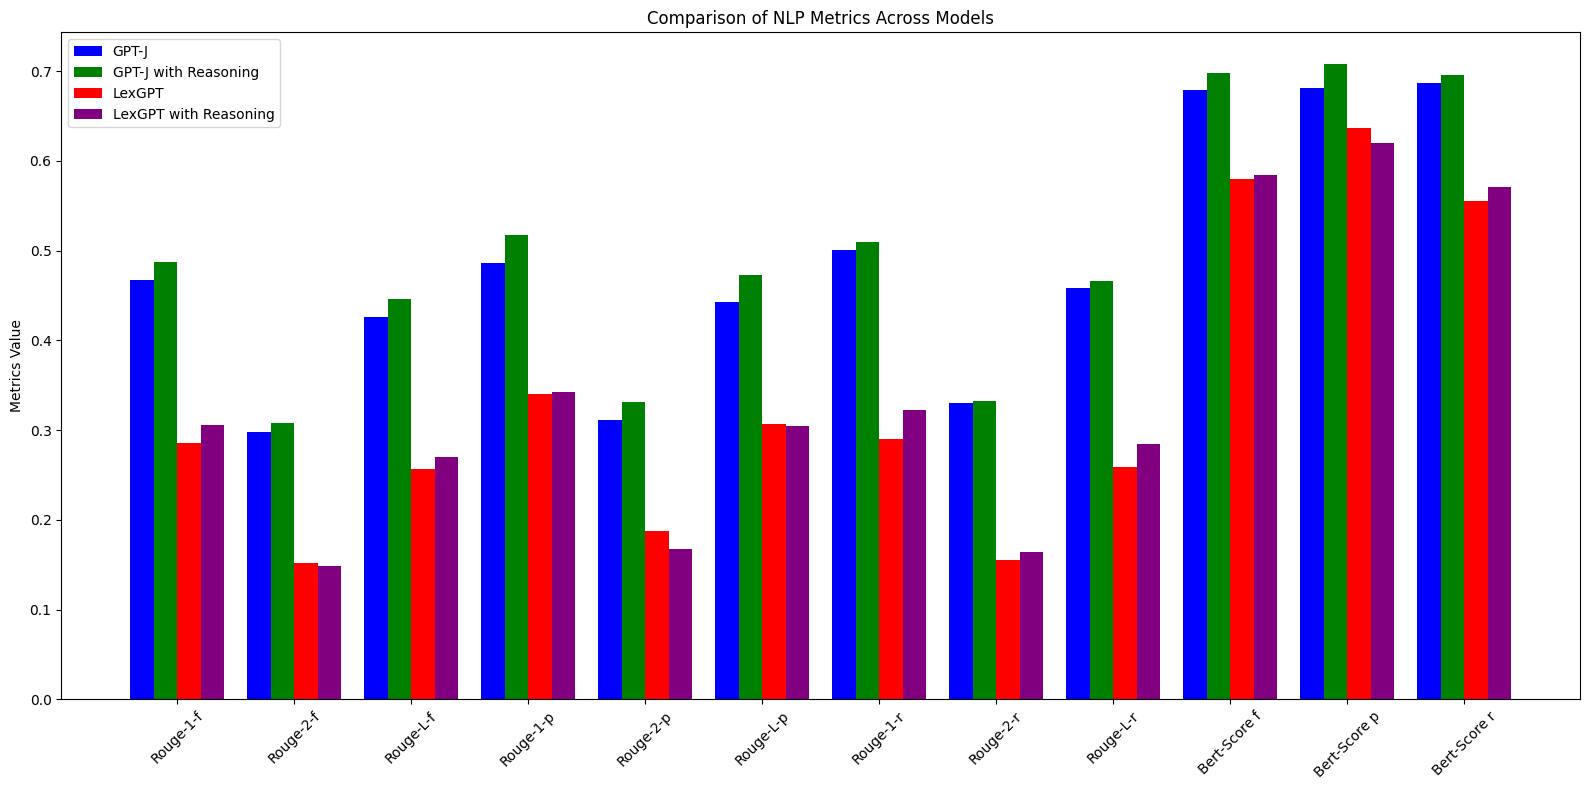

In [124]:
import matplotlib.pyplot as plt

import numpy as np

# Data

labels = ['Rouge-1-f', 'Rouge-2-f', 'Rouge-L-f', 'Rouge-1-p', 'Rouge-2-p', 'Rouge-L-p', 'Rouge-1-r', 'Rouge-2-r', 'Rouge-L-r', 'Bert-f', 'Bert-p', 'Bert-r']

gptj_zero = [gptj_zero['rouge-1-f'].mean(), gptj_zero['rouge-2-f'].mean(), gptj_zero['rouge-l-f'].mean(), gptj_zero['rouge-1-p'].mean(), gptj_zero['rouge-2-p'].mean(), gptj_zero['rouge-l-p'].mean(), gptj_zero['rouge-1-r'].mean(), gptj_zero['rouge-2-r'].mean(), gptj_zero['rouge-l-r'].mean(), gptj_zero_bf.mean(), gptj_zero_bp.mean(), gptj_zero_br.mean()]

gptj_one = [gptj_one['rouge-1-f'].mean(), gptj_one['rouge-2-f'].mean(), gptj_one['rouge-l-f'].mean(), gptj_one['rouge-1-p'].mean(), gptj_one['rouge-2-p'].mean(), gptj_one['rouge-l-p'].mean(), gptj_one['rouge-1-r'].mean(), gptj_one['rouge-2-r'].mean(), gptj_one['rouge-l-r'].mean(), gptj_one_bf.mean(), gptj_one_bp.mean(), gptj_one_br.mean()]

gptj_few = [gptj_few['rouge-1-f'].mean(), gptj_few['rouge-2-f'].mean(), gptj_few['rouge-l-f'].mean(), gptj_few['rouge-1-p'].mean(), gptj_few['rouge-2-p'].mean(), gptj_few['rouge-l-p'].mean(), gptj_few['rouge-1-r'].mean(), gptj_few['rouge-2-r'].mean(), gptj_few['rouge-l-r'].mean(), gptj_few_bf.mean(), gptj_few_bp.mean(), gptj_few_br.mean()]

# Plotting with updated requirements
fig, ax = plt.subplots(figsize=(16, 8))

# Different colors for each model
colors = ['blue', 'green', 'red', 'purple']

rects1 = ax.bar(x - width*1.5, gptj_zero, width, label='GPT-J Zero-Shot', color=colors[0])
rects2 = ax.bar(x - width/2, gptj_one, width, label='GPT-J One-Shot', color=colors[1])
rects3 = ax.bar(x + width/2, gptj_few, width, label='GPT-J Few-Shot', color=colors[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Metrics Value')
ax.set_title('Comparison of NLP Metrics Across Models')
ax.set_xticks(x)
# Update label names to include Bert-Score prefix
updated_labels = [label if 'Bert' not in label else 'Bert-Score ' + label.split('-')[-1] for label in labels]
ax.set_xticklabels(updated_labels)
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()